In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [3]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff


# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    colonnes = tableau_corr.columns
    val_temp = 0 
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
                val_temp += 1

            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
                val_temp += 1
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0
    if val_temp == 0:
        print("IL N'Y A PAS DE CORRELATION ENTRE LES VARIABLES PAR RAPPORT AU SEUIL PRIS")
        


In [4]:
# les noms des variables

colonnes =(["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL", "Top_mon"])

In [5]:
#data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/sans_8_new_my_data_FDFTOT21.txt", delim_whitespace="\t", header = None, names=colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data = data_orig.copy()
print("taille du dataset d'origine : ",data.shape)

taille du dataset d'origine :  (1192180, 23)


In [6]:
########################################################################################################
#                                          TOUTES LES VARIABLES
########################################################################################################

In [7]:
# élimination des individus n'ayant pas de valeur pour la variable Top_mon 
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


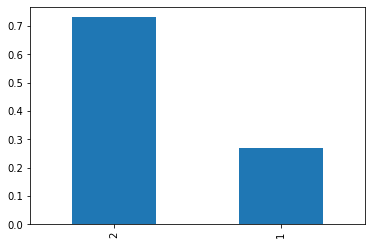

In [8]:
# PROPORTION DES CLASSES DE LA VARIABLE CIBLE
data_sans_nan.iloc[:,-1].value_counts(dropna = False, normalize=True).plot.bar()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


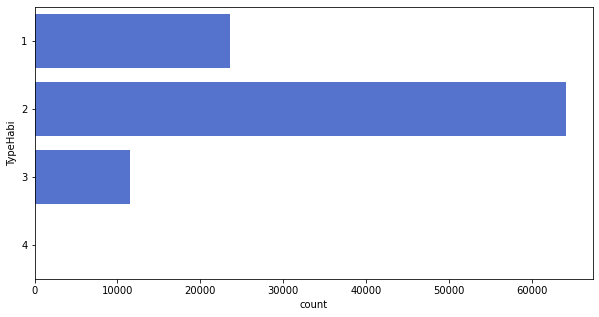

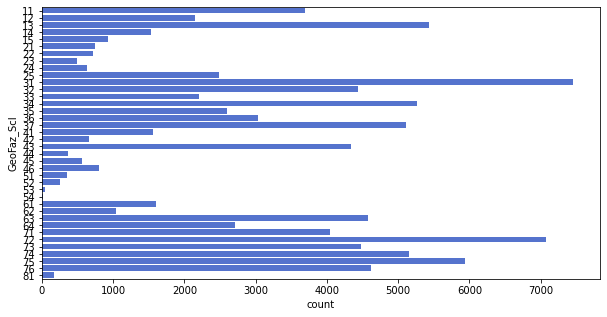

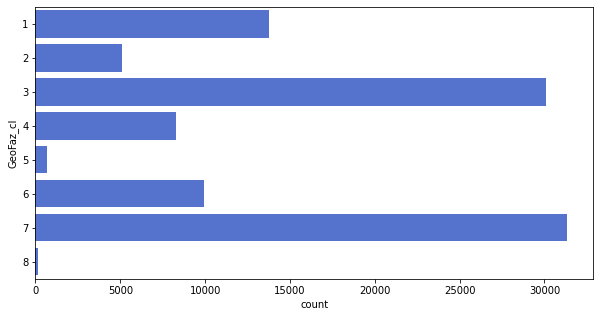

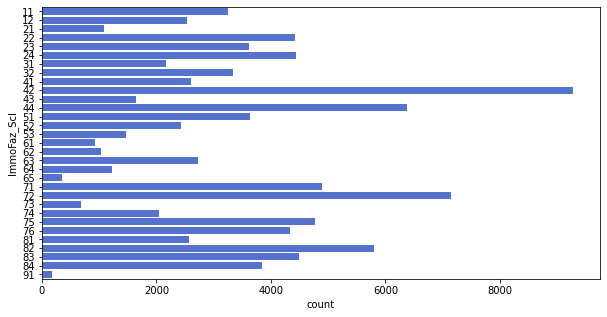

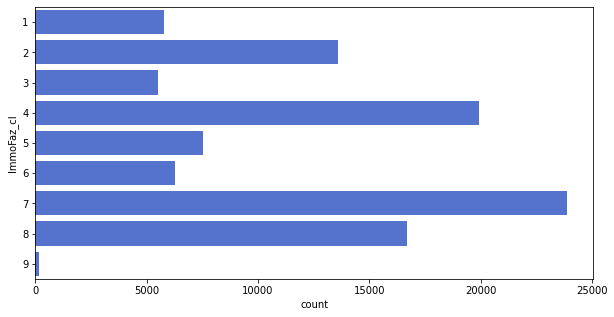

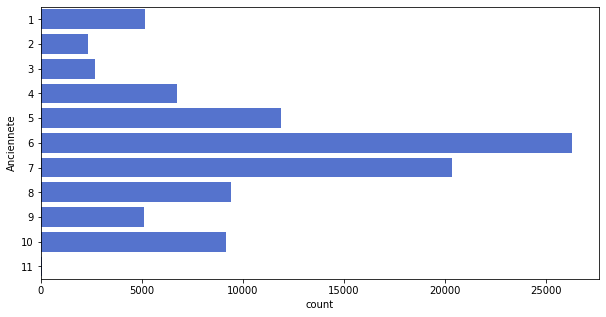

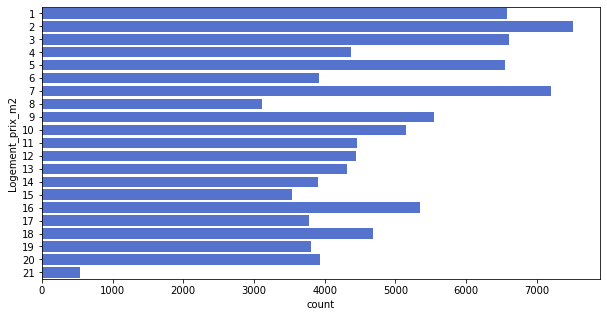

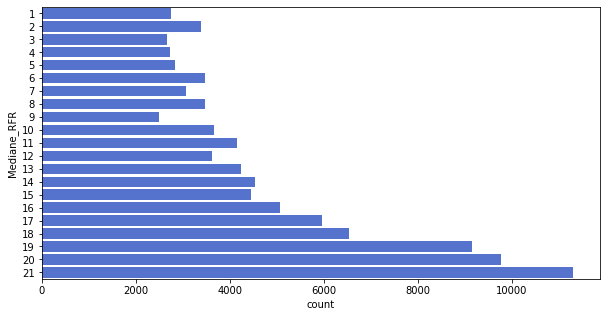

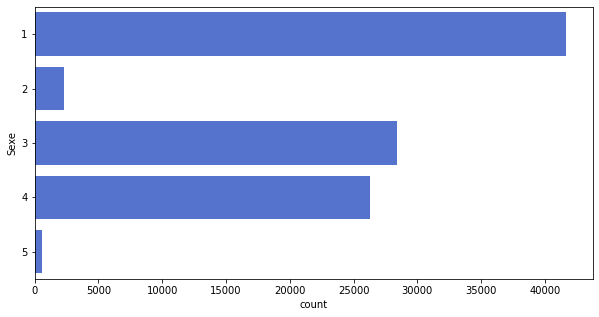

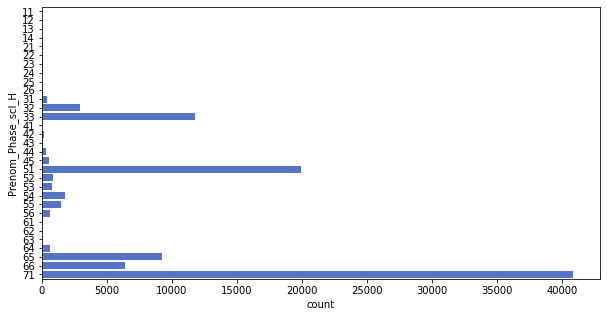

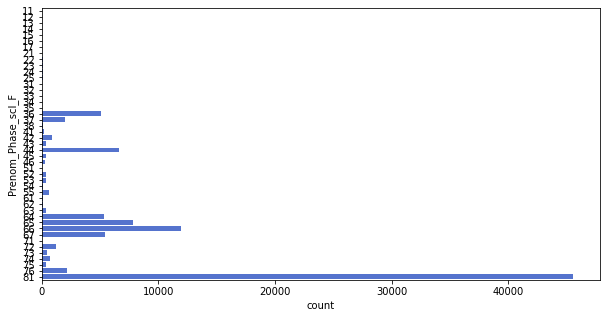

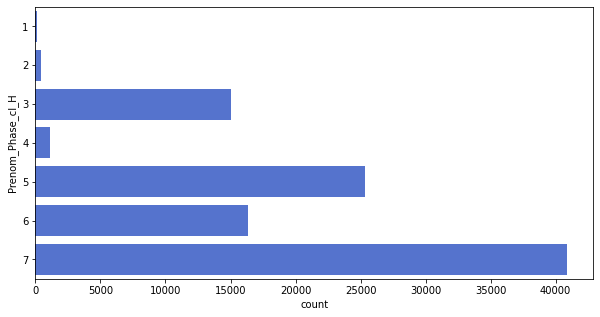

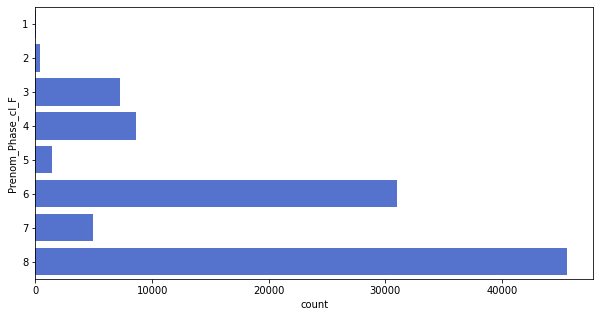

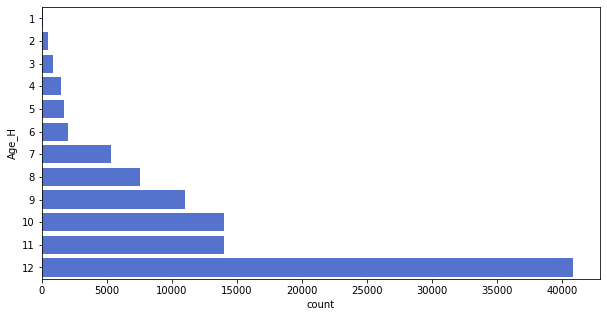

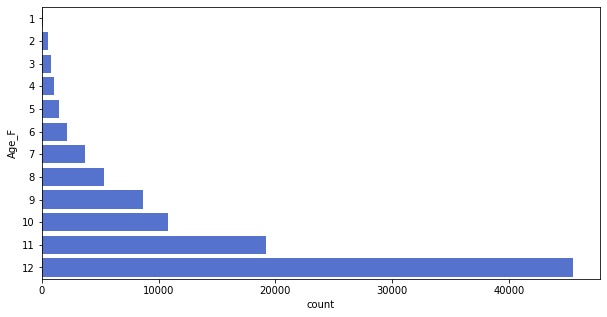

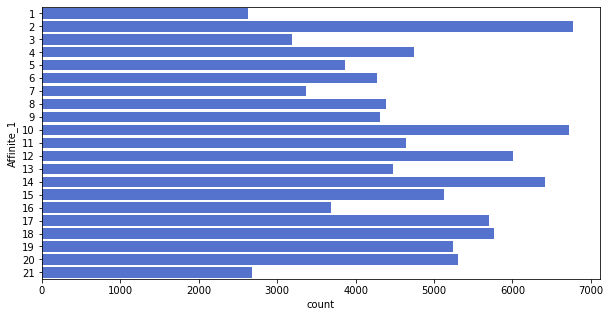

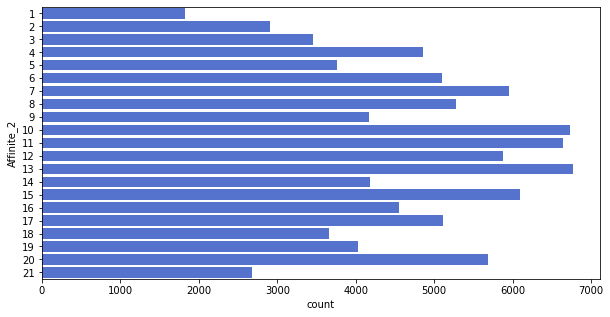

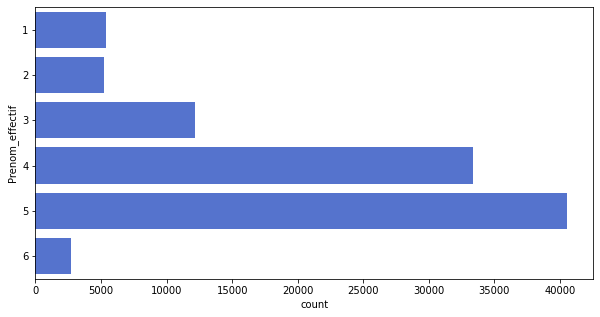

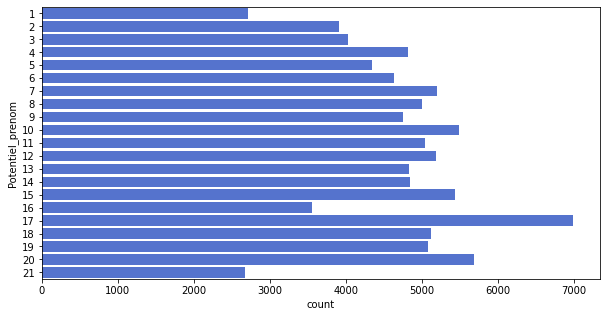

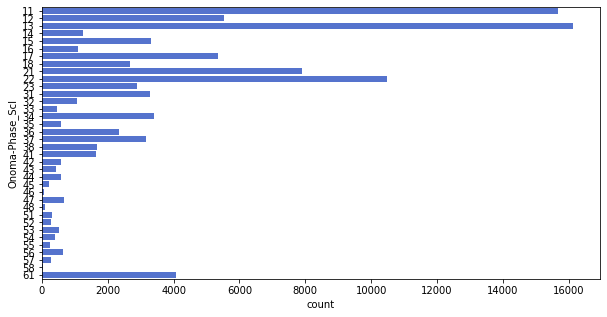

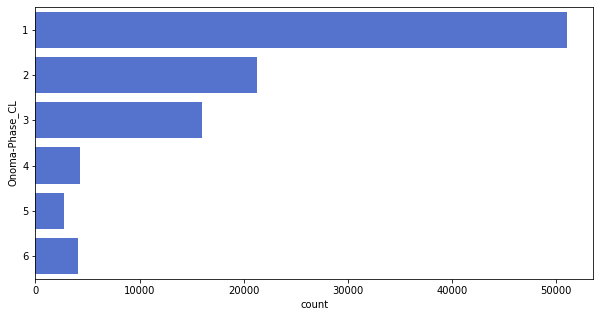

In [9]:
# PROPORTION DES CLASSES DE CHACUNE DES VARIABLES EXPLICATIVES
for val in data_sans_nan.columns[1:-1] :
    plt.figure(figsize=(10,5))
    sns.countplot(y=val,data=data_sans_nan, orient='v', color= 'royalblue' )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


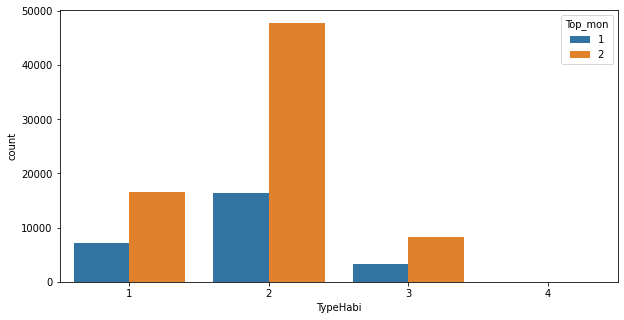

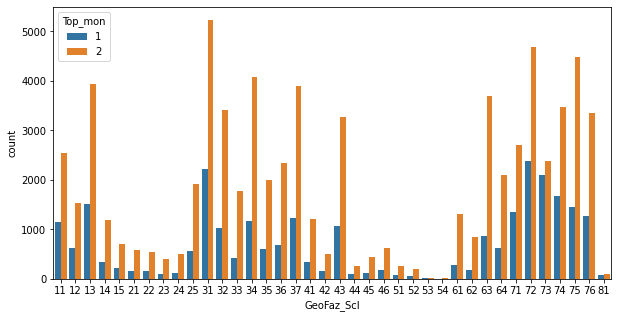

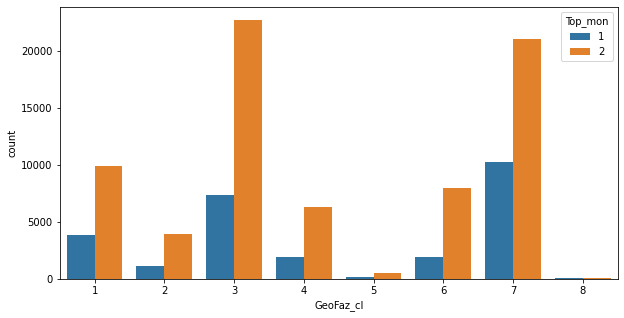

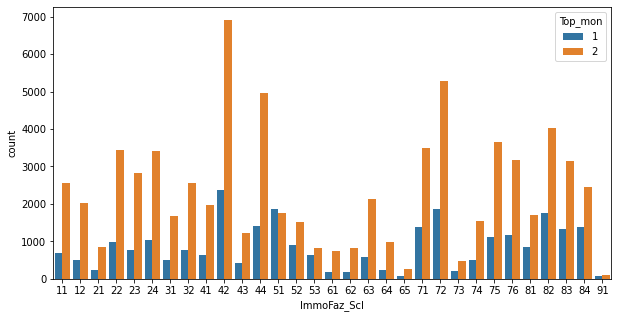

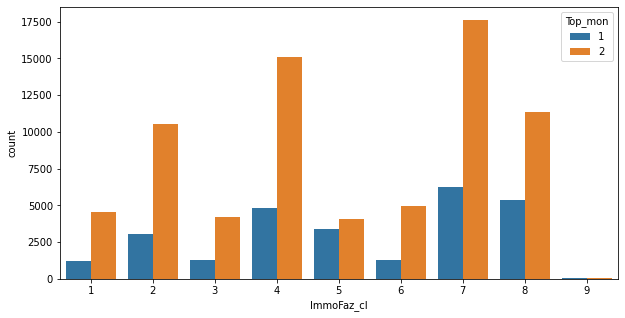

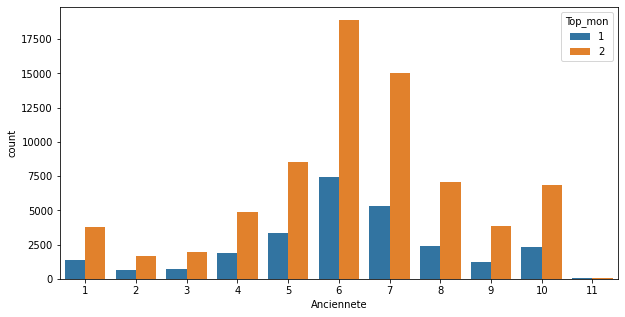

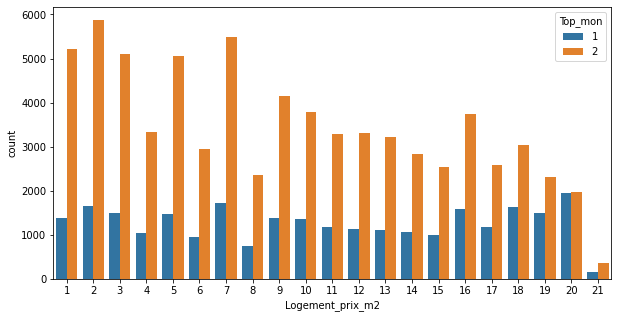

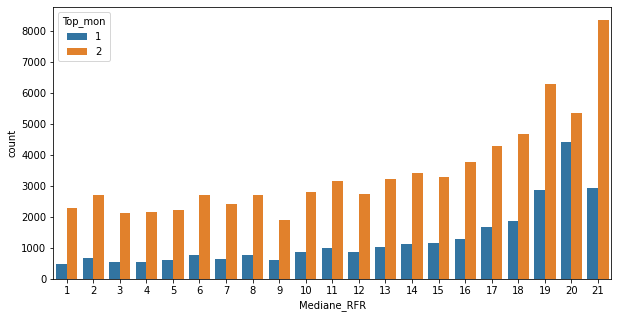

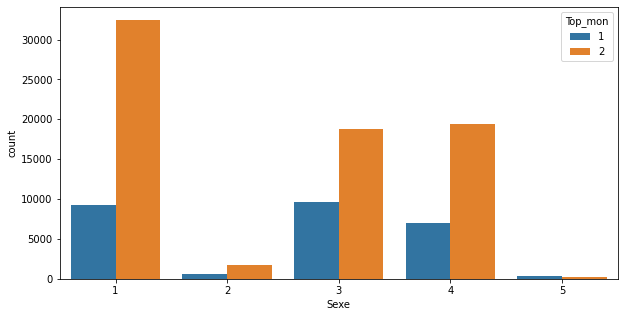

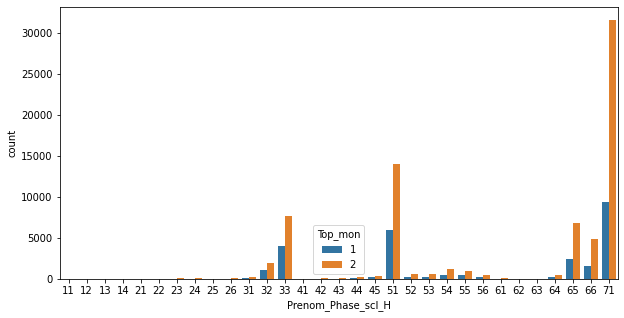

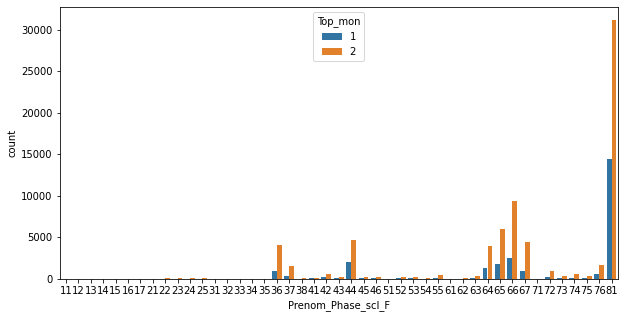

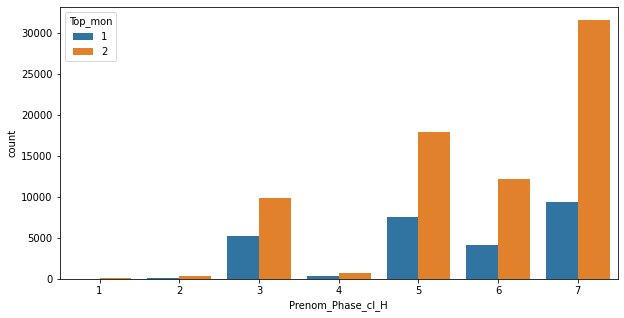

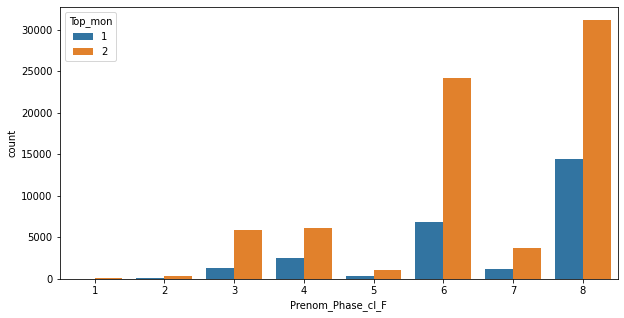

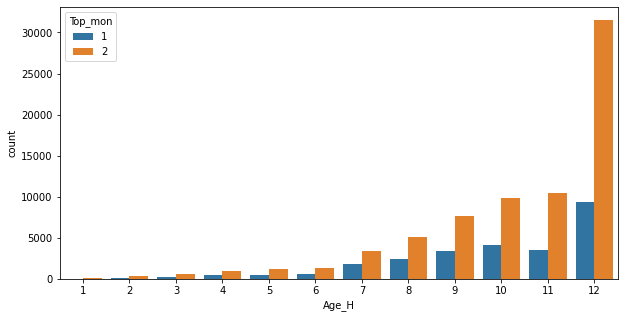

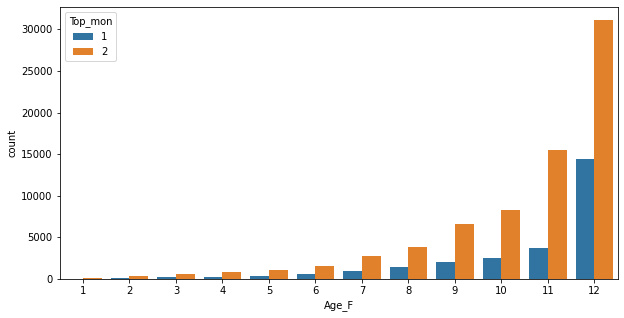

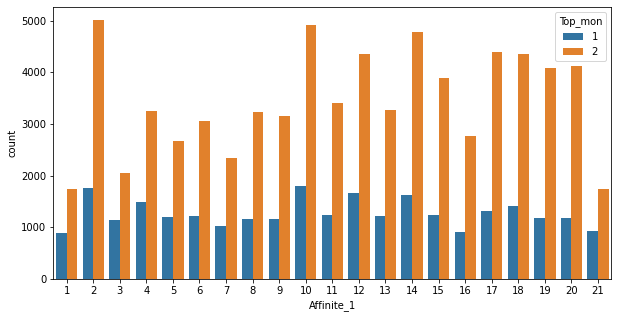

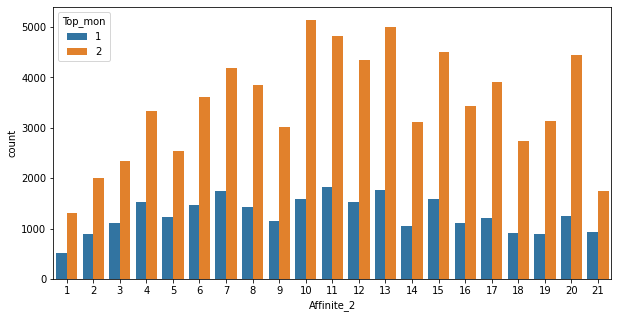

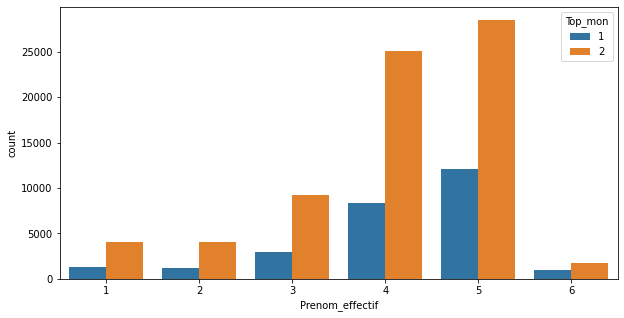

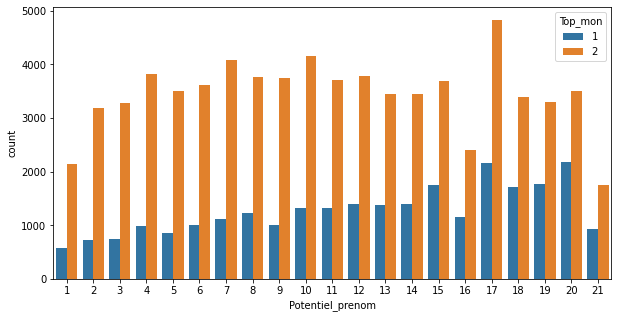

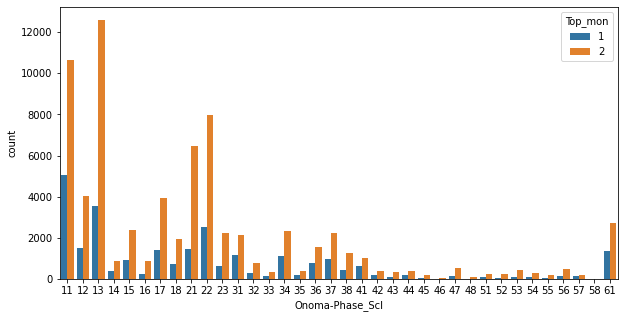

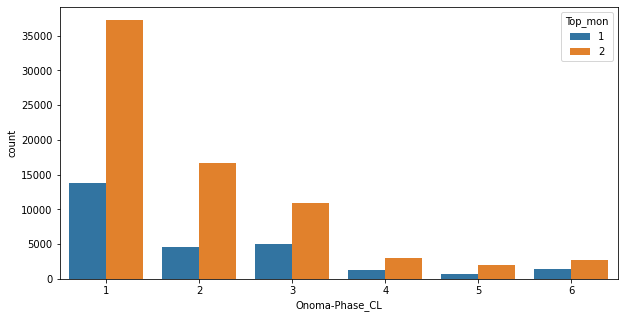

In [10]:
# PROPORTION DES CLASSES DE CHACUNE DES VARIABLES EXPLICATIVES EN FONCTION DES CLASSES DE LA VARIABLE CIBLE
for val in data_sans_nan.columns[1:-1] :
    plt.figure(figsize=(10,5))
    sns.countplot( x=val , hue="Top_mon" , data=data_sans_nan)


In [11]:
# tableau de corrélation 
tableau_corr = data_sans_nan.iloc[:,1:-1].corr()
tableau_corr.head(5)

,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL
TypeHabi,1.000000,-0.273971,-0.279688,-0.135448,-0.132509,0.036373,-0.235844,-0.012325,0.083143,-0.052470,0.030252,-0.056649,0.031401,-0.038451,0.027414,-0.016916,-0.000114,0.016107,0.036138,-0.037657,-0.035870
GeoFaz_Scl,-0.273971,1.000000,0.996889,0.239715,0.217566,-0.063330,0.306326,-0.125018,-0.111332,0.075532,-0.050103,0.079830,-0.053618,0.055498,-0.043441,0.021672,0.012684,-0.035073,-0.059601,0.052816,0.048651
GeoFaz_cl,-0.279688,0.996889,1.000000,0.262754,0.241009,-0.062863,0.331074,-0.109429,-0.113426,0.076255,-0.051089,0.080761,-0.054487,0.055478,-0.045444,0.021718,0.010322,-0.035789,-0.060014,0.056230,0.051963
ImmoFaz_Scl,-0.135448,0.239715,0.262754,1.000000,0.998309,-0.068222,0.772653,0.345121,-0.078794,0.045623,-0.025966,0.049289,-0.026077,0.031162,-0.041003,0.006620,-0.026147,-0.022345,-0.026239,0.050098,0.045594
ImmoFaz_cl,-0.132509,0.217566,0.241009,0.998309,1.000000,-0.066567,0.779534,0.358974,-0.075986,0.043017,-0.024873,0.046650,-0.024794,0.029031,-0.041052,0.005154,-0.028057,-0.021597,-0.023839,0.050467,0.045985


In [12]:
# CORRELATION ENTRE VARIABLES
variables_corr(tableau_corr, seuil= 0.90)

variable :  GeoFaz_Scl
corr pos ['GeoFaz_cl']
corr pos [1.0]

variable :  ImmoFaz_Scl
corr pos ['ImmoFaz_cl']
corr pos [1.0]

variable :  Prenom_Phase_scl_H
corr pos ['Prenom_Phase_cl_H']
corr pos [0.99]

variable :  Prenom_Phase_scl_F
corr pos ['Prenom_Phase_cl_F']
corr pos [0.99]

variable :  Onoma-Phase_Scl
corr pos ['Onoma-Phase_CL']
corr pos [0.99]



In [13]:
##################################################################################################################

In [14]:


def mod_pourcentage(df_test):
    for ii in range(df_test.shape[1]):
        temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)
        temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1)
        temp_rest.columns = [[temp_ctt.name, "%"]]
        print(temp_rest); print("="*50)  



def mod_pourcentage_seuil(df_test, seuil):
    for ii in range(df_test.shape[1]):
        temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)
        temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1)
        temp_rest.columns = [[temp_ctt.name, "%"]]
        print(temp_rest); print("="*50)            
        temp_index_sort = temp_rest[temp_rest.iloc[:,1]>seuil].index.sort_values()
        
        for j in range(temp_index_sort.shape[0]):
            index_temp = temp_index_sort[j]
            liste_nom_mod_filtr.append(temp_ctt.name+"_"+str(index_temp))
    print("Taille : ",len(liste_nom_mod_filtr))
    return liste_nom_mod_filtr

In [15]:
mod_pourcentage(data_sans_nan.iloc[:,1:])

  TypeHabi      %
2    64089  64.54
1    23604  23.77
3    11536  11.62
4       67   0.07
   GeoFaz_Scl     %
31       7459  7.51
72       7077  7.13
75       5941  5.98
13       5437  5.48
34       5262  5.30
74       5158  5.19
37       5109  5.15
76       4623  4.66
63       4579  4.61
73       4481  4.51
32       4443  4.47
43       4338  4.37
71       4041  4.07
11       3696  3.72
36       3027  3.05
64       2708  2.73
35       2596  2.61
25       2493  2.51
33       2210  2.23
12       2155  2.17
61       1596  1.61
41       1555  1.57
14       1526  1.54
62       1042  1.05
15        929  0.94
46        798  0.80
21        739  0.74
22        718  0.72
42        660  0.66
24        629  0.63
45        565  0.57
23        497  0.50
44        366  0.37
51        347  0.35
52        259  0.26
81        174  0.18
53         42  0.04
54         21  0.02
  GeoFaz_cl      %
7     31321  31.54
3     30106  30.32
1     13743  13.84
6      9925  10.00
4      8282   8.34
2      5076   5.

In [16]:
# NOMBRE D'INDIVIDUS PAR MODALITE ET LE POURCENTAGE CORRESPONDANT
liste_nom_mod_filtr = [] 
mod_pourcentage_seuil(data_sans_nan.iloc[:,1:-1], 5)

  TypeHabi      %
2    64089  64.54
1    23604  23.77
3    11536  11.62
4       67   0.07
   GeoFaz_Scl     %
31       7459  7.51
72       7077  7.13
75       5941  5.98
13       5437  5.48
34       5262  5.30
74       5158  5.19
37       5109  5.15
76       4623  4.66
63       4579  4.61
73       4481  4.51
32       4443  4.47
43       4338  4.37
71       4041  4.07
11       3696  3.72
36       3027  3.05
64       2708  2.73
35       2596  2.61
25       2493  2.51
33       2210  2.23
12       2155  2.17
61       1596  1.61
41       1555  1.57
14       1526  1.54
62       1042  1.05
15        929  0.94
46        798  0.80
21        739  0.74
22        718  0.72
42        660  0.66
24        629  0.63
45        565  0.57
23        497  0.50
44        366  0.37
51        347  0.35
52        259  0.26
81        174  0.18
53         42  0.04
54         21  0.02
  GeoFaz_cl      %
7     31321  31.54
3     30106  30.32
1     13743  13.84
6      9925  10.00
4      8282   8.34
2      5076   5.

['TypeHabi_1',
 'TypeHabi_2',
 'TypeHabi_3',
 'GeoFaz_Scl_13',
 'GeoFaz_Scl_31',
 'GeoFaz_Scl_34',
 'GeoFaz_Scl_37',
 'GeoFaz_Scl_72',
 'GeoFaz_Scl_74',
 'GeoFaz_Scl_75',
 'GeoFaz_cl_1',
 'GeoFaz_cl_2',
 'GeoFaz_cl_3',
 'GeoFaz_cl_4',
 'GeoFaz_cl_6',
 'GeoFaz_cl_7',
 'ImmoFaz_Scl_42',
 'ImmoFaz_Scl_44',
 'ImmoFaz_Scl_72',
 'ImmoFaz_Scl_82',
 'ImmoFaz_cl_1',
 'ImmoFaz_cl_2',
 'ImmoFaz_cl_3',
 'ImmoFaz_cl_4',
 'ImmoFaz_cl_5',
 'ImmoFaz_cl_6',
 'ImmoFaz_cl_7',
 'ImmoFaz_cl_8',
 'Anciennete_1',
 'Anciennete_4',
 'Anciennete_5',
 'Anciennete_6',
 'Anciennete_7',
 'Anciennete_8',
 'Anciennete_9',
 'Anciennete_10',
 'Logement_prix_m2_1',
 'Logement_prix_m2_2',
 'Logement_prix_m2_3',
 'Logement_prix_m2_5',
 'Logement_prix_m2_7',
 'Logement_prix_m2_9',
 'Logement_prix_m2_10',
 'Logement_prix_m2_16',
 'Mediane_RFR_16',
 'Mediane_RFR_17',
 'Mediane_RFR_18',
 'Mediane_RFR_19',
 'Mediane_RFR_20',
 'Mediane_RFR_21',
 'Sexe_1',
 'Sexe_3',
 'Sexe_4',
 'Prenom_Phase_scl_H_33',
 'Prenom_Phase_scl_H_51',

In [17]:
########################################################################################################
#                                           SANS VARIABLES CORR
########################################################################################################

In [18]:
# test predict individus sans classe
data = data_orig.copy()

# on élimine les variables dons
data=data.drop(["GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Prenom_Phase_cl_H", "Prenom_Phase_cl_F",
                "Onoma-Phase_Scl", "Onoma-Phase_CL"],axis=1)

data_data = data.copy()

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe Top_mon
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)
"""
# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])
"""

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


'\n# base de données avec des variables corrélées et avec encodage OneHot\ndata =data_sans_nan\n\nnb_var = data.shape[1] - 1\ntrain_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )\n\ntrain_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()\ntrain_Y_s = np.asanyarray(train_set.iloc[:,nb_var])\n\ntest_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()\ntest_Y_s = np.asanyarray(test_set.iloc[:,nb_var])\n'

In [19]:
# tableau de corrélation 
tableau_corr = data_sans_nan.iloc[:,1:-1].corr()
tableau_corr.head(5) 

,TypeHabi_01,TypeHabi_02,TypeHabi_03,TypeHabi_04,GeoFaz_Scl_11,GeoFaz_Scl_12,GeoFaz_Scl_13,GeoFaz_Scl_14,GeoFaz_Scl_15,GeoFaz_Scl_21,GeoFaz_Scl_22,GeoFaz_Scl_23,GeoFaz_Scl_24,GeoFaz_Scl_25,GeoFaz_Scl_31,GeoFaz_Scl_32,GeoFaz_Scl_33,GeoFaz_Scl_34,GeoFaz_Scl_35,GeoFaz_Scl_36,GeoFaz_Scl_37,GeoFaz_Scl_41,GeoFaz_Scl_42,GeoFaz_Scl_43,GeoFaz_Scl_44,GeoFaz_Scl_45,GeoFaz_Scl_46,GeoFaz_Scl_51,GeoFaz_Scl_52,GeoFaz_Scl_53,GeoFaz_Scl_54,GeoFaz_Scl_61,GeoFaz_Scl_62,GeoFaz_Scl_63,GeoFaz_Scl_64,GeoFaz_Scl_71,GeoFaz_Scl_72,GeoFaz_Scl_73,GeoFaz_Scl_74,GeoFaz_Scl_75,...,Affinite_2_09,Affinite_2_10,Affinite_2_11,Affinite_2_12,Affinite_2_13,Affinite_2_14,Affinite_2_15,Affinite_2_16,Affinite_2_17,Affinite_2_18,Affinite_2_19,Affinite_2_20,Affinite_2_21,Prenom_effectif_01,Prenom_effectif_02,Prenom_effectif_03,Prenom_effectif_04,Prenom_effectif_05,Prenom_effectif_06,Potentiel_prenom_01,Potentiel_prenom_02,Potentiel_prenom_03,Potentiel_prenom_04,Potentiel_prenom_05,Potentiel_prenom_06,Potentiel_prenom_07,Potentiel_prenom_08,Potentiel_prenom_09,Potentiel_prenom_10,Potentiel_prenom_11,Potentiel_prenom_12,Potentiel_prenom_13,Potentiel_prenom_14,Potentiel_prenom_15,Potentiel_prenom_16,Potentiel_prenom_17,Potentiel_prenom_18,Potentiel_prenom_19,Potentiel_prenom_20,Potentiel_prenom_21
TypeHabi_01,1.000000,-0.753434,-0.202464,-0.014511,-0.102552,-0.049890,-0.129412,-0.068804,-0.053777,-0.048356,-0.047379,-0.039272,-0.044289,-0.088406,-0.083752,-0.090992,-0.072385,-0.094714,-0.084084,-0.092829,-0.127060,-0.069674,-0.045097,-0.088916,-0.033185,-0.042244,-0.048144,-0.033069,-0.028557,-0.003433,0.013029,0.110921,-0.038006,0.090186,0.095762,0.204198,0.190505,0.299489,0.145933,0.082069,...,-0.028308,0.009714,0.000655,0.005285,-0.010492,0.021781,-0.006265,0.003803,-0.005481,-0.008725,-0.004562,-0.003575,0.039574,0.042406,0.010929,-0.000927,0.004619,-0.041314,0.039700,0.041311,0.013964,0.024523,0.029394,0.022363,0.003715,-0.000528,-0.005720,0.023178,0.010162,-0.015467,-0.012757,-0.011675,0.012028,-0.011949,-0.030494,-0.034071,-0.017709,-0.027920,-0.021267,0.039490
TypeHabi_02,-0.753434,1.000000,-0.489166,-0.035059,0.115930,0.050436,0.153125,0.085409,0.064375,0.061486,0.057789,0.046304,0.052810,0.111811,0.072018,0.086994,0.080287,0.092633,0.087269,0.112937,0.148608,0.088739,0.058297,0.093118,0.042997,0.055229,0.060583,0.041038,0.036665,-0.001135,-0.013832,-0.108496,0.039761,-0.104434,-0.099632,-0.208212,-0.196197,-0.284892,-0.199039,-0.131680,...,0.024725,-0.017361,-0.000859,-0.004359,0.007944,-0.019884,0.008167,-0.002568,0.004529,0.007084,0.006562,0.001338,-0.034214,-0.045749,-0.015054,-0.002414,-0.004263,0.044855,-0.034371,-0.038596,-0.013532,-0.021535,-0.032341,-0.021949,-0.005735,-0.002123,0.002770,-0.026797,-0.011396,0.014735,0.008706,0.010428,-0.014269,0.016606,0.026415,0.037946,0.021042,0.032281,0.021691,-0.034109
TypeHabi_03,-0.202464,-0.489166,1.000000,-0.009421,-0.036424,-0.008706,-0.056178,-0.035842,-0.024461,-0.027372,-0.023152,-0.016808,-0.019837,-0.049143,0.004344,-0.008540,-0.023383,-0.011971,-0.018239,-0.044912,-0.052574,-0.039655,-0.027337,-0.020447,-0.019978,-0.026173,-0.026298,-0.017742,-0.016692,0.006298,0.003372,0.014890,-0.008654,0.036567,0.021880,0.040008,0.040044,0.027919,0.103775,0.088093,...,0.000350,0.013207,0.000851,-0.000119,0.002274,0.000878,-0.003986,-0.001057,0.000725,0.001260,-0.003622,0.002864,-0.001920,0.011074,0.008028,0.004571,0.000794,-0.011930,-0.001853,0.002322,0.001755,-0.000950,0.009563,0.003204,0.003794,0.004225,0.003373,0.009099,0.003747,-0.001250,0.003595,-0.000313,0.004925,-0.008687,0.000804,-0.011054,-0.007682,-0.011041,-0.004018,-0.001964
TypeHabi_04,-0.014511,-0.035059,-0.009421,1.000000,-0.005109,-0.003870,-0.006254,-0.003246,-0.002525,-0.002250,-0.002218,-0.001843,-0.002075,-0.004170,-0.007405,-0.005624,-0.003920,-0.006147,-0.004258,-0.004608,-0.006052,-0.003278,0.002647,-0.005554,-0.001581,-0.001966,-0.002339,0.005033,-0.001329,-0.000535,-0.000378,-0.003321,-0.002676,-0.005713,-0.004351,-0.005352,-0.002676,-0.005649,-

In [20]:
# CORRELATION ENTRE VARIABLES
variables_corr(tableau_corr, seuil= 0.90)

variable :  TypeHabi_04
corr pos ['Anciennete_11']
corr pos [0.91]

variable :  Prenom_Phase_scl_H_71
corr pos ['Age_H_12']
corr pos [1.0]

variable :  Prenom_Phase_scl_F_81
corr pos ['Age_F_12']
corr pos [1.0]

variable :  Affinite_1_21
corr pos ['Affinite_2_21', 'Prenom_effectif_06', 'Potentiel_prenom_21']
corr pos [1.0, 1.0, 1.0]

variable :  Affinite_2_21
corr pos ['Prenom_effectif_06', 'Potentiel_prenom_21']
corr pos [1.0, 1.0]

variable :  Prenom_effectif_06
corr pos ['Potentiel_prenom_21']
corr pos [1.0]



In [21]:
# NOMBRE D'INDIVIDUS PAR MODALITE ET LE POURCENTAGE CORRESPONDANT
liste_nom_mod_filtr = [] 
liste_util = mod_pourcentage_seuil(data_data.iloc[:,1:-1], 5)

   TypeHabi      %
02   787631  66.07
01   270543  22.69
03   133334  11.18
04      672   0.06
   GeoFaz_Scl     %
31      99428  8.34
72      95047  7.97
13      67889  5.69
75      65711  5.51
74      63139  5.30
34      62424  5.24
37      58766  4.93
73      55540  4.66
43      54106  4.54
76      53115  4.46
32      52139  4.37
11      51143  4.29
71      50323  4.22
63      47298  3.97
36      35798  3.00
64      30008  2.52
12      29541  2.48
35      28379  2.38
25      27630  2.32
33      25993  2.18
41      19125  1.60
14      17798  1.49
61      14980  1.26
62      10842  0.91
15      10486  0.88
46       8667  0.73
21       8018  0.67
22       7891  0.66
42       7864  0.66
24       6855  0.57
45       6057  0.51
23       5613  0.47
44       4296  0.36
51       3631  0.30
81       3199  0.27
52       2645  0.22
53        616  0.05
54        180  0.02
   Anciennete      %
06     319899  26.83
07     251636  21.11
05     139188  11.68
08     117031   9.82
10     109786   9.21

In [22]:
# AU MOINS 5% DES INDIVIDUS ONT CES MODALITES
liste_util

['TypeHabi_01',
 'TypeHabi_02',
 'TypeHabi_03',
 'GeoFaz_Scl_13',
 'GeoFaz_Scl_31',
 'GeoFaz_Scl_34',
 'GeoFaz_Scl_72',
 'GeoFaz_Scl_74',
 'GeoFaz_Scl_75',
 'Anciennete_04',
 'Anciennete_05',
 'Anciennete_06',
 'Anciennete_07',
 'Anciennete_08',
 'Anciennete_09',
 'Anciennete_10',
 'Logement_prix_m2_01',
 'Logement_prix_m2_02',
 'Logement_prix_m2_03',
 'Logement_prix_m2_05',
 'Logement_prix_m2_07',
 'Logement_prix_m2_09',
 'Logement_prix_m2_10',
 'Logement_prix_m2_16',
 'Logement_prix_m2_18',
 'Mediane_RFR_16',
 'Mediane_RFR_17',
 'Mediane_RFR_18',
 'Mediane_RFR_19',
 'Mediane_RFR_20',
 'Mediane_RFR_21',
 'Sexe_01',
 'Sexe_03',
 'Sexe_04',
 'Prenom_Phase_scl_H_33',
 'Prenom_Phase_scl_H_51',
 'Prenom_Phase_scl_H_65',
 'Prenom_Phase_scl_H_66',
 'Prenom_Phase_scl_H_71',
 'Prenom_Phase_scl_F_36',
 'Prenom_Phase_scl_F_44',
 'Prenom_Phase_scl_F_64',
 'Prenom_Phase_scl_F_65',
 'Prenom_Phase_scl_F_66',
 'Prenom_Phase_scl_F_67',
 'Prenom_Phase_scl_F_81',
 'Age_H_08',
 'Age_H_09',
 'Age_H_10',
 

In [23]:
################################################################################################################
#
################################################################################################################

In [31]:
2619/4965

0.5274924471299094

In [ ]:
[72092,  9936],
       [49979, 20127]

In [17]:
72092/(72092+9936)*100

87.88706295411323

In [18]:
20127/(9979+20127)*100

66.85378329901016

In [20]:
72092/(72092+49979)*100

59.0574337885329

In [21]:
20127/(9936+20127)*100


66.94940624688155